<a href="https://colab.research.google.com/github/suraj93/Intro-to-Quant-Modelling-CFA-2025/blob/main/Section_1_Market_Data_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# India Portfolio Analysis Workshop
## Section 1: Portfolio Math - The Foundation That Most Get Wrong

**Duration**: 15 minutes  
**Format**: DEMO → CONCEPT → WARNING → ENGAGEMENT

---

### Learning Objectives
1. Understand why common return calculations are **wrong**
2. Master weight drift mechanics and portfolio growth decomposition
3. Build muscle memory for portfolio math diagnostics

### Critical Takeaway
> **"Compounding is not optional - it's mathematical truth. Get this wrong, and everything downstream is fiction."**

---
## Setup: Import Libraries & Load Data

In [ ]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [ ]:
import importlib

from google.colab import drive
drive.mount('/content/gdrive')

import sys
import os
sys.path.append('/content/gdrive/My Drive/Finance AI/2025 CFA Quant workshop/')

FILE_DIRECTORY = '/content/gdrive/My Drive/Finance AI/2025 CFA Quant workshop/data'
directory = FILE_DIRECTORY
if not os.path.exists(directory):
    os.makedirs(directory)

import yfinance_writer as yfw
# Reload the module to ensure the latest function definition is used
importlib.reload(yfw)

inputfolder = FILE_DIRECTORY
prices = yfw.load_workshop_data(inputfolder+'/india_market_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<module 'yfinance_writer' from '/content/gdrive/My Drive/Finance AI/2025 CFA Quant workshop/yfinance_writer.py'>

In [ ]:
inputfolder = FILE_DIRECTORY
prices = yfw.load_workshop_data(inputfolder+'/india_market_data.csv')

ANALYSIS_START = '2019-01-01'
ANALYSIS_END = '2024-01-01'

# Filter data to analysis period
prices_analysis = prices.loc[ANALYSIS_START:ANALYSIS_END].copy()

print(f"Analysis Period: {ANALYSIS_START} to {ANALYSIS_END}")
print(f"Total days: {len(prices_analysis)}")
print(f"\nPrice summary statistics:")
prices_analysis.describe()

Analysis Period: 2019-01-01 to 2024-01-01
Total days: 1236

Price summary statistics:


,NIFTYBEES,JUNIORBEES,BANKBEES,GOLDBEES,LIQUIDBEES,NIFTY50,NIFTY_BANK,NIFTY_MIDCAP,GSEC10YR
count,1236.0000,1236.0000,1236.0000,1236.0000,1236.0000,1236.0000,1236.0000,1236.0000,1236.0000
mean,161.2259,371.4794,345.2772,41.6061,841.1192,14954.1636,34150.1282,7005.8647,260.0151
std,38.3103,82.1825,74.7954,6.8638,37.3369,3306.7700,7251.7506,2333.7177,23.3341
min,13.0200,199.0500,32.9510,0.3355,779.9398,7610.2500,16917.4531,2904.9971,216.5893
25%,123.0793,286.6475,299.3590,38.6925,813.5552,11671.6626,29531.8940,4738.3884,239.8353
50%,169.3400,395.3250,350.1000,42.5700,836.8488,15730.0000,34798.5684,7358.5635,268.0175
75%,193.0000,446.0300,401.2200,45.2125,864.0021,17755.0503,39670.6143,8593.4607,274.6759
max,240.3500,568.1300,493.5800,53.8400,925.5730,21778.6992,48508.5508,13144.9502,308.4639


---
## 📊 DEMO PART 1: Single Asset - NIFTY50 Index

### Start Simple: One Index, Three Methods

Before we look at portfolios, let's see the problem with a **single asset**: the NIFTY50 Index.  
This makes it crystal clear which calculation methods are wrong.

**Question**: If NIFTY50 started at one level and ended at another, what's the return?
- **Answer**: It depends on HOW you calculate it!

In [ ]:
# Extract NIFTY50 data for our analysis period
nifty_prices = prices_analysis['NIFTY50'].copy()
nifty_returns = nifty_prices.pct_change().dropna()

# Basic facts
nifty_start = nifty_prices.iloc[0]
nifty_end = nifty_prices.iloc[-1]
nifty_days = len(nifty_returns)

print("NIFTY50 Index - Analysis Period:")
print(f"Start Date: {nifty_prices.index[0].date()}")
print(f"End Date: {nifty_prices.index[-1].date()}")
print(f"Starting Level: {nifty_start:,.2f}")
print(f"Ending Level: {nifty_end:,.2f}")
print(f"Trading Days: {nifty_days}")

NIFTY50 Index - Analysis Period:
Start Date: 2019-01-01
End Date: 2024-01-01
Starting Level: 10,862.55
Ending Level: 21,741.90
Trading Days: 1235


In [ ]:
# METHOD 1: Simple Average (WRONG!)
nifty_method1 = nifty_returns.mean() * nifty_days
nifty_method1_annual = nifty_method1 / (nifty_days / 252)

print("METHOD 1: Simple Average (WRONG!)")
print(f"  Total Return: {nifty_method1*100:.2f}%")
print(f"  Annualized: {nifty_method1_annual*100:.2f}%")
print(f"  ❌ Treats returns as ADDITIVE")

# METHOD 2: Arithmetic Sum (WRONG!)
nifty_method2 = nifty_returns.sum()
nifty_method2_annual = nifty_method2 / (nifty_days / 252)

print("METHOD 2: Arithmetic Sum (WRONG!)")
print(f"  Total Return: {nifty_method2*100:.2f}%")
print(f"  Annualized: {nifty_method2_annual*100:.2f}%")
print(f"  ❌ Ignores COMPOUNDING")

# METHOD 3: Price Ratio (CORRECT!)
nifty_method3 = (nifty_end / nifty_start) - 1
nifty_method3_annual = (1 + nifty_method3) ** (252 / nifty_days) - 1

print("METHOD 3: Price Ratio (CORRECT!)")
print(f"  Total Return: {nifty_method3*100:.2f}%")
print(f"  Annualized: {nifty_method3_annual*100:.2f}%")
print(f"  ✓ Correct for single asset")

METHOD 1: Simple Average (WRONG!)
  Total Return: 78.43%
  Annualized: 16.00%
  ❌ Treats returns as ADDITIVE
METHOD 2: Arithmetic Sum (WRONG!)
  Total Return: 78.43%
  Annualized: 16.00%
  ❌ Ignores COMPOUNDING
METHOD 3: Price Ratio (CORRECT!)
  Total Return: 100.15%
  Annualized: 15.21%
  ✓ Correct for single asset


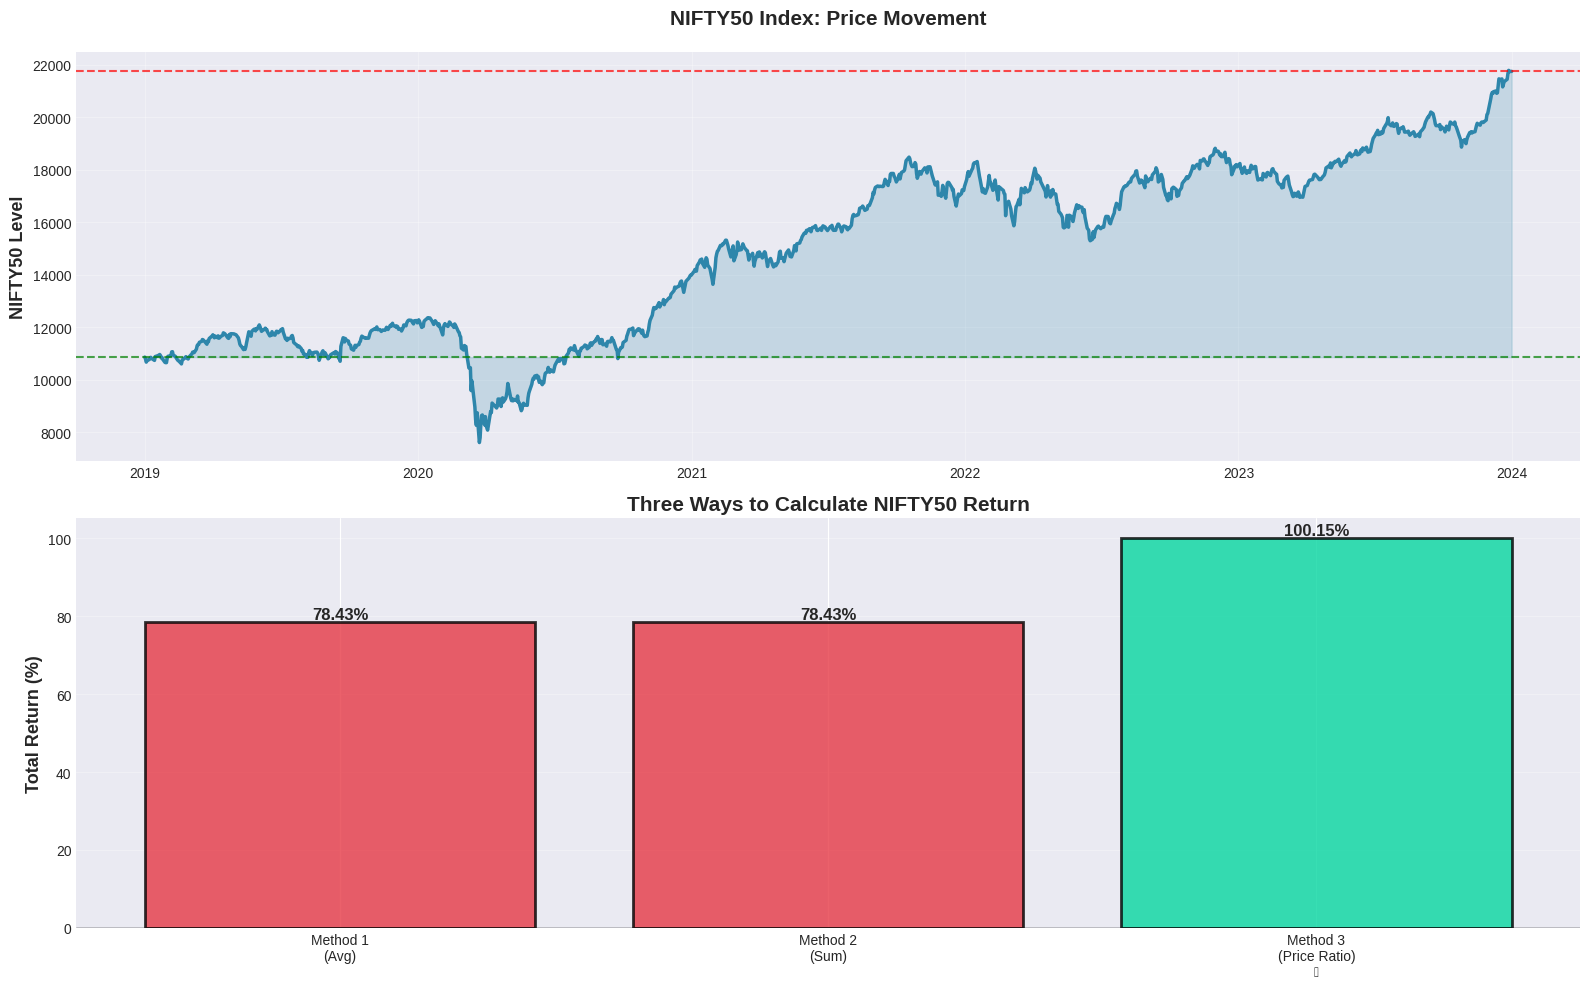


For single asset, price ratio (Method 3) is clearly correct.
Now let's see what happens with a portfolio...


In [ ]:
# 📊 VISUAL: NIFTY50 Analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Top: Price chart
ax1.plot(nifty_prices.index, nifty_prices.values, linewidth=2.5, color='#2E86AB')
ax1.axhline(y=nifty_start, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.axhline(y=nifty_end, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.fill_between(nifty_prices.index, nifty_start, nifty_prices.values, alpha=0.2, color='#2E86AB')
ax1.set_ylabel('NIFTY50 Level', fontsize=13, fontweight='bold')
ax1.set_title('NIFTY50 Index: Price Movement', fontsize=15, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)

# Bottom: Methods comparison
methods = ['Method 1\n(Avg)', 'Method 2\n(Sum)', 'Method 3\n(Price Ratio)\n✓']
returns_pct = [nifty_method1*100, nifty_method2*100, nifty_method3*100]
colors = ['#E63946', '#E63946', '#06D6A0']

bars = ax2.bar(methods, returns_pct, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_ylabel('Total Return (%)', fontsize=13, fontweight='bold')
ax2.set_title('Three Ways to Calculate NIFTY50 Return', fontsize=15, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, returns_pct):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{value:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nFor single asset, price ratio (Method 3) is clearly correct.")
print(f"Now let's see what happens with a portfolio...")

---
## 📊 DEMO PART 2: Multi-Asset Portfolio

### Moving to Multiple Assets

**Portfolio Setup:**
- Initial Capital: ₹1,00,000
- NIFTY50: 60%
- NIFTY_MIDCAP: 30%
- GOLDBEES: 10%

Let's calculate returns using three methods.

In [ ]:
# Portfolio configuration
INITIAL_CAPITAL = 100000
WEIGHTS = {'NIFTY50': 0.60, 'NIFTY_MIDCAP': 0.30, 'GOLDBEES': 0.10}

# Select data
portfolio_assets = list(WEIGHTS.keys())
portfolio_prices = prices_analysis[portfolio_assets].copy()
portfolio_returns = portfolio_prices.pct_change().dropna()

print("Portfolio Setup:")
print(f"Initial Capital: ₹{INITIAL_CAPITAL:,.0f}")
for asset, weight in WEIGHTS.items():
    print(f"  {asset}: {weight*100:.0f}%")
print(f"\nAnalysis period: {len(portfolio_returns)} trading days")

Portfolio Setup:
Initial Capital: ₹100,000
  NIFTY50: 60%
  NIFTY_MIDCAP: 30%
  GOLDBEES: 10%

Analysis period: 1235 trading days


In [ ]:
# METHOD 1: Arithmetic Sum (WRONG!)
port_returns_daily = (portfolio_returns * pd.Series(WEIGHTS)).sum(axis=1)
port_method1 = port_returns_daily.sum()
port_method1_annual = port_method1 / (len(portfolio_returns) / 252)

print("METHOD 1: Arithmetic Sum (WRONG!)")
print(f"  Total Return: {port_method1*100:.2f}%")
print(f"  Annualized: {port_method1_annual*100:.2f}%")
print(f"  ❌ Ignores compounding")

METHOD 1: Arithmetic Sum (WRONG!)
  Total Return: 1067.30%
  Annualized: 217.78%
  ❌ Ignores compounding


In [ ]:
# METHOD 2: Buy-and-Hold Price Ratio (CORRECT!)
start_prices = portfolio_prices.iloc[0]
end_prices = portfolio_prices.iloc[-1]
asset_returns = (end_prices / start_prices) - 1
port_method2 = (asset_returns * pd.Series(WEIGHTS)).sum()
port_method2_annual = (1 + port_method2) ** (252 / len(portfolio_returns)) - 1

print("METHOD 2: Buy-and-Hold (Price Ratio) (CORRECT!)")
print(f"  Total Return: {port_method2*100:.2f}%")
print(f"  Annualized: {port_method2_annual*100:.2f}%")
print(f"  ✓ What you actually earn if you buy and hold")

METHOD 2: Buy-and-Hold (Price Ratio) (CORRECT!)
  Total Return: 119.14%
  Annualized: 17.36%
  ✓ What you actually earn if you buy and hold


In [ ]:
# METHOD 3: Time-Weighted Geometric (CORRECT!)

cumulative_growth = portfolio_prices / portfolio_prices.iloc[0]
portfolio_value = INITIAL_CAPITAL * (cumulative_growth * pd.Series(WEIGHTS)).sum(axis=1)
port_method3 = (portfolio_value.iloc[-1] / INITIAL_CAPITAL) - 1
port_method3_annual = (1 + port_method3) ** (252 / len(portfolio_returns)) - 1

print("METHOD 3: Time-Weighted Geometric (CORRECT!)")
print(f"  Total Return: {port_method3*100:.2f}%")
print(f"  Annualized: {port_method3_annual*100:.2f}%")
print(f"  Final Value: ₹{portfolio_values.iloc[-1]:,.0f}")
print(f"  ✓ Industry standard, useful for rebalancing analysis")

METHOD 3: Time-Weighted Geometric (CORRECT!)
  Total Return: 119.14%
  Annualized: 17.36%
  Final Value: ₹2,178,155
  ✓ Industry standard, useful for rebalancing analysis


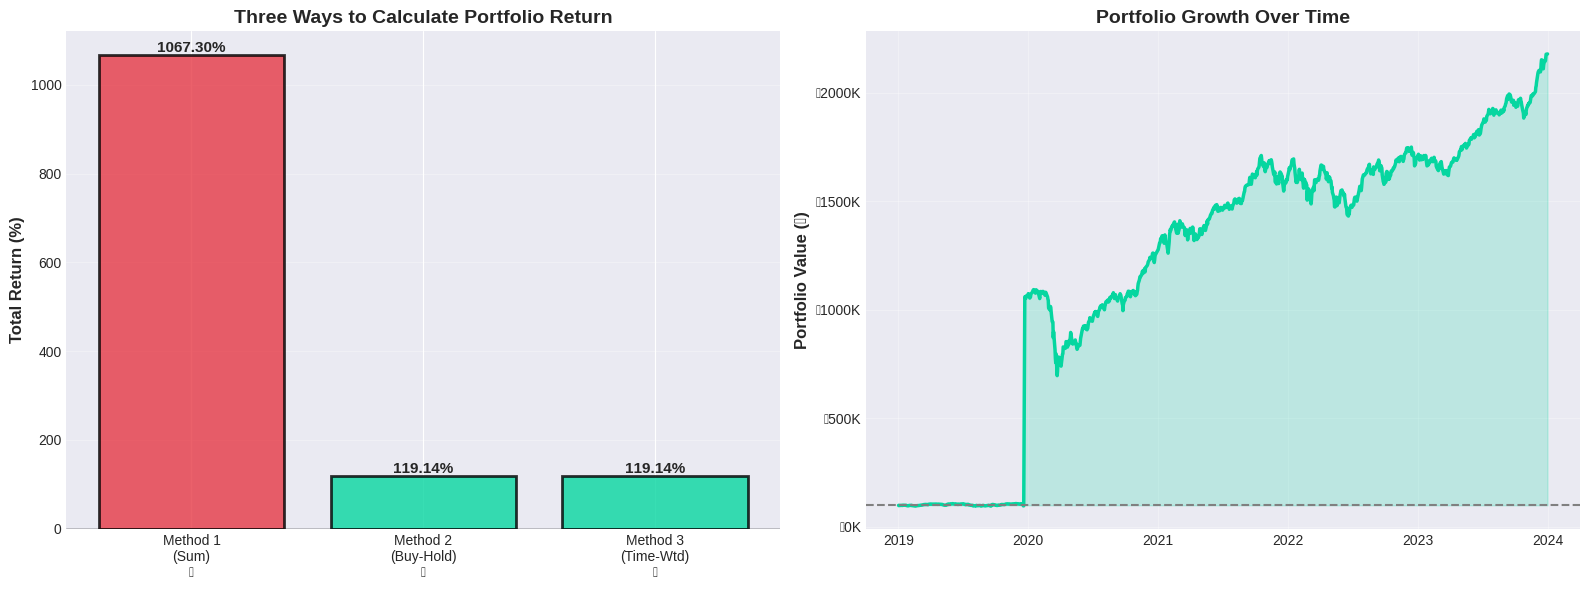


💡 KEY INSIGHT: Methods 2 and 3 give the same result (119.14%)
   for buy-and-hold portfolios.

   Method 3 (time-weighted) will be useful later when we discuss
   rebalancing strategies in Section 5.


In [ ]:
# 📊 VISUAL: Portfolio Methods Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Methods comparison
methods = ['Method 1\n(Sum)\n❌', 'Method 2\n(Buy-Hold)\n✓', 'Method 3\n(Time-Wtd)\n✓']
returns_pct = [port_method1*100, port_method2*100, port_method3*100]
colors = ['#E63946', '#06D6A0', '#06D6A0']

bars = ax1.bar(methods, returns_pct, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.set_ylabel('Total Return (%)', fontsize=12, fontweight='bold')
ax1.set_title('Three Ways to Calculate Portfolio Return', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, returns_pct):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{value:.2f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Right: Portfolio value over time
ax2.plot(portfolio_values.index, portfolio_values.values, linewidth=2.5, color='#06D6A0')
ax2.axhline(y=INITIAL_CAPITAL, color='gray', linestyle='--', linewidth=1.5)
ax2.fill_between(portfolio_values.index, INITIAL_CAPITAL, portfolio_values.values, alpha=0.2, color='#06D6A0')
ax2.set_ylabel('Portfolio Value (₹)', fontsize=12, fontweight='bold')
ax2.set_title('Portfolio Growth Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHT: Methods 2 and 3 give the same result ({port_method2*100:.2f}%)")
print(f"   for buy-and-hold portfolios.")
print(f"\n   Method 3 (time-weighted) will be useful later when we discuss")
print(f"   rebalancing strategies in Section 5.")

---
## 📈 Performance Breakdown Analysis

### Understanding Portfolio Growth

Let's break down how the portfolio grew over time:
1. **Individual asset performance** - Which assets drove returns?
2. **Portfolio value composition** - How much wealth came from each asset?

In [ ]:
# Calculate normalized asset growth (starting from 100)
normalized_assets = portfolio_prices / portfolio_prices.iloc[0] * 100

# Calculate portfolio value breakdown (in rupees)
nifty_value = INITIAL_CAPITAL * WEIGHTS['NIFTY50'] * (portfolio_prices['NIFTY50'] / portfolio_prices['NIFTY50'].iloc[0])
small_value = INITIAL_CAPITAL * WEIGHTS['NIFTY_MIDCAP'] * (portfolio_prices['NIFTY_MIDCAP'] / portfolio_prices['NIFTY_MIDCAP'].iloc[0])
gold_value = INITIAL_CAPITAL * WEIGHTS['GOLDBEES'] * (portfolio_prices['GOLDBEES'] / portfolio_prices['GOLDBEES'].iloc[0])
total_value = nifty_value + small_value + gold_value

print("Portfolio Component Values:")
print(f"\nInitial (Day 0):")
print(f"  NIFTY50:  ₹{INITIAL_CAPITAL * WEIGHTS['NIFTY50']:,.0f}")
print(f"  NIFTY_MIDCAP: ₹{INITIAL_CAPITAL * WEIGHTS['NIFTY_MIDCAP']:,.0f}")
print(f"  GOLDBEES:   ₹{INITIAL_CAPITAL * WEIGHTS['GOLDBEES']:,.0f}")
print(f"  Total:      ₹{INITIAL_CAPITAL:,.0f}")

print(f"\nFinal (Day {len(portfolio_prices)-1}):")
print(f"  NIFTY50:  ₹{nifty_value.iloc[-1]:,.0f}")
print(f"  NIFTY_MIDCAP: ₹{small_value.iloc[-1]:,.0f}")
print(f"  GOLDBEES:   ₹{gold_value.iloc[-1]:,.0f}")
print(f"  Total:      ₹{total_value.iloc[-1]:,.0f}")

print(f"\nGain by Asset:")
print(f"  NIFTY50:  ₹{nifty_value.iloc[-1] - INITIAL_CAPITAL * WEIGHTS['NIFTY50']:,.0f}")
print(f"  NIFTY_MIDCAP: ₹{small_value.iloc[-1] - INITIAL_CAPITAL * WEIGHTS['NIFTY_MIDCAP']:,.0f}")
print(f"  GOLDBEES:   ₹{gold_value.iloc[-1] - INITIAL_CAPITAL * WEIGHTS['GOLDBEES']:,.0f}")

Portfolio Component Values:

Initial (Day 0):
  NIFTY50:  ₹60,000
  NIFTY_MIDCAP: ₹30,000
  GOLDBEES:   ₹10,000
  Total:      ₹100,000

Final (Day 1235):
  NIFTY50:  ₹120,093
  NIFTY_MIDCAP: ₹79,978
  GOLDBEES:   ₹19,072
  Total:      ₹219,143

Gain by Asset:
  NIFTY50:  ₹60,093
  NIFTY_MIDCAP: ₹49,978
  GOLDBEES:   ₹9,072


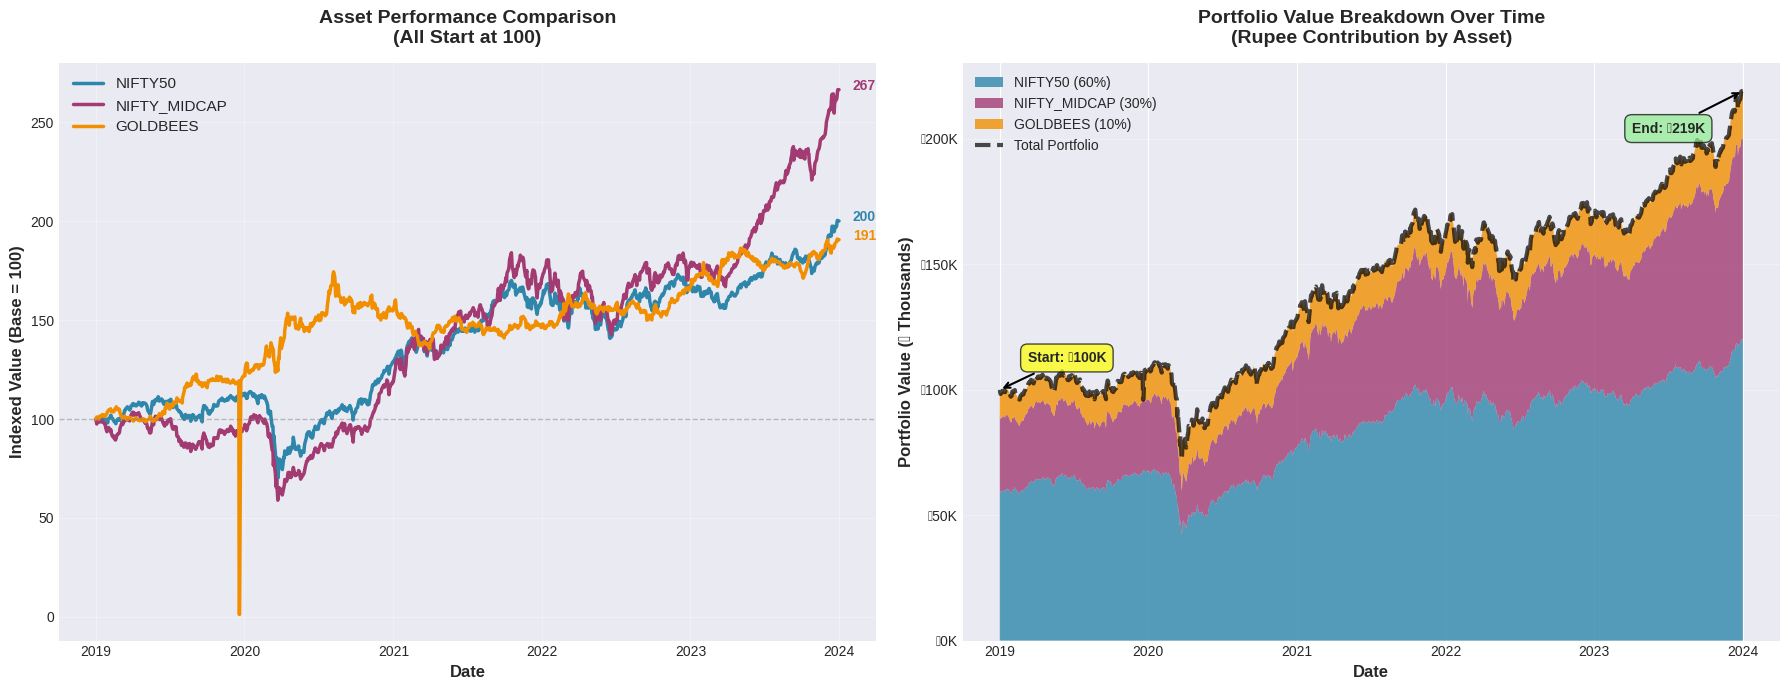


💡 KEY INSIGHTS:
   • Different assets grew at different rates (see left chart)
   • Your ₹30K in NIFTY_MIDCAP became ₹80K
   • Your ₹60K in NIFTY50 became ₹120K
   • This differential growth is WHY portfolio weights drift!


In [ ]:
# 📊 VISUAL: Performance Breakdown
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# LEFT: Normalized Asset Growth Comparison
ax1.plot(normalized_assets.index, normalized_assets['NIFTY50'],
         linewidth=2.5, label='NIFTY50', color='#2E86AB')
ax1.plot(normalized_assets.index, normalized_assets['NIFTY_MIDCAP'],
         linewidth=2.5, label='NIFTY_MIDCAP', color='#A23B72')
ax1.plot(normalized_assets.index, normalized_assets['GOLDBEES'],
         linewidth=2.5, label='GOLDBEES', color='#F18F01')
ax1.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax1.set_ylabel('Indexed Value (Base = 100)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_title('Asset Performance Comparison\n(All Start at 100)', fontsize=14, fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3)

# Add final values annotation
for col, color in [('NIFTY50', '#2E86AB'), ('NIFTY_MIDCAP', '#A23B72'), ('GOLDBEES', '#F18F01')]:
    final_val = normalized_assets[col].iloc[-1]
    ax1.annotate(f'{final_val:.0f}',
                xy=(normalized_assets.index[-1], final_val),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10, fontweight='bold', color=color)

# RIGHT: Portfolio Value Breakdown (Stacked Area)
ax2.stackplot(portfolio_prices.index,
              nifty_value / 1000,  # Convert to thousands for readability
              small_value / 1000,
              gold_value / 1000,
              labels=['NIFTY50 (60%)', 'NIFTY_MIDCAP (30%)', 'GOLDBEES (10%)'],
              colors=['#2E86AB', '#A23B72', '#F18F01'],
              alpha=0.8)

# Add total portfolio line on top
ax2.plot(portfolio_prices.index, total_value / 1000,
         linewidth=3, color='black', linestyle='--', label='Total Portfolio', alpha=0.7)

ax2.set_ylabel('Portfolio Value (₹ Thousands)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_title('Portfolio Value Breakdown Over Time\n(Rupee Contribution by Asset)',
             fontsize=14, fontweight='bold', pad=15)
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x:.0f}K'))

# Add initial and final total annotations
ax2.annotate(f'Start: ₹{INITIAL_CAPITAL/1000:.0f}K',
            xy=(portfolio_prices.index[0], INITIAL_CAPITAL/1000),
            xytext=(20, 20), textcoords='offset points',
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=1.5))

ax2.annotate(f'End: ₹{total_value.iloc[-1]/1000:.0f}K',
            xy=(portfolio_prices.index[-1], total_value.iloc[-1]/1000),
            xytext=(-80, -30), textcoords='offset points',
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7),
            arrowprops=dict(arrowstyle='->', lw=1.5))

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHTS:")
print(f"   • Different assets grew at different rates (see left chart)")
print(f"   • Your ₹{INITIAL_CAPITAL * WEIGHTS['NIFTY_MIDCAP']/1000:.0f}K in NIFTY_MIDCAP became ₹{small_value.iloc[-1]/1000:.0f}K")
print(f"   • Your ₹{INITIAL_CAPITAL * WEIGHTS['NIFTY50']/1000:.0f}K in NIFTY50 became ₹{nifty_value.iloc[-1]/1000:.0f}K")
print(f"   • This differential growth is WHY portfolio weights drift!")

---
## ⚖️ Weight Drift Analysis

### The Silent Portfolio Transformation

As we saw, different assets grew at different rates. This means your portfolio weights **naturally drift** away from your initial 60/30/10 allocation.

Let's calculate exactly how much drift occurred.

In [ ]:
# Calculate weight drift over time
def calculate_weight_drift(returns, initial_weights, initial_capital):
    """
    Track how portfolio weights change due to differential asset performance
    """
    weights_over_time = pd.DataFrame(index=returns.index)

    # Initialize holdings
    holdings = {asset: initial_capital * weight for asset, weight in initial_weights.items()}

    for date in returns.index:
        # Update holdings based on returns
        for asset in initial_weights.keys():
            holdings[asset] *= (1 + returns.loc[date, asset])

        # Calculate total value and weights
        total_value = sum(holdings.values())
        for asset in initial_weights.keys():
            weights_over_time.loc[date, asset] = holdings[asset] / total_value

    return weights_over_time

# Calculate drift
weight_drift = calculate_weight_drift(portfolio_returns, WEIGHTS, INITIAL_CAPITAL)

print("Weight Drift Analysis:")
print(f"\nInitial Weights (Day 0):")
for asset, weight in WEIGHTS.items():
    print(f"  {asset:12s}: {weight*100:5.1f}%")

print(f"\nFinal Weights (After {len(portfolio_returns)} days, NO rebalancing):")
final_weights = weight_drift.iloc[-1]
for asset in WEIGHTS.keys():
    drift = (final_weights[asset] - WEIGHTS[asset]) * 100
    print(f"  {asset:12s}: {final_weights[asset]*100:5.1f}% (drift: {drift:+5.1f}pp)")

print(f"\n💡 Without rebalancing, your 60/30/10 portfolio became "
      f"{final_weights['NIFTY50']*100:.0f}/{final_weights['NIFTY_MIDCAP']*100:.0f}/{final_weights['GOLDBEES']*100:.0f}!")

Weight Drift Analysis:

Initial Weights (Day 0):
  NIFTY50     :  60.0%
  NIFTY_MIDCAP:  30.0%
  GOLDBEES    :  10.0%

Final Weights (After 1235 days, NO rebalancing):
  NIFTY50     :  54.8% (drift:  -5.2pp)
  NIFTY_MIDCAP:  36.5% (drift:  +6.5pp)
  GOLDBEES    :   8.7% (drift:  -1.3pp)

💡 Without rebalancing, your 60/30/10 portfolio became 55/36/9!


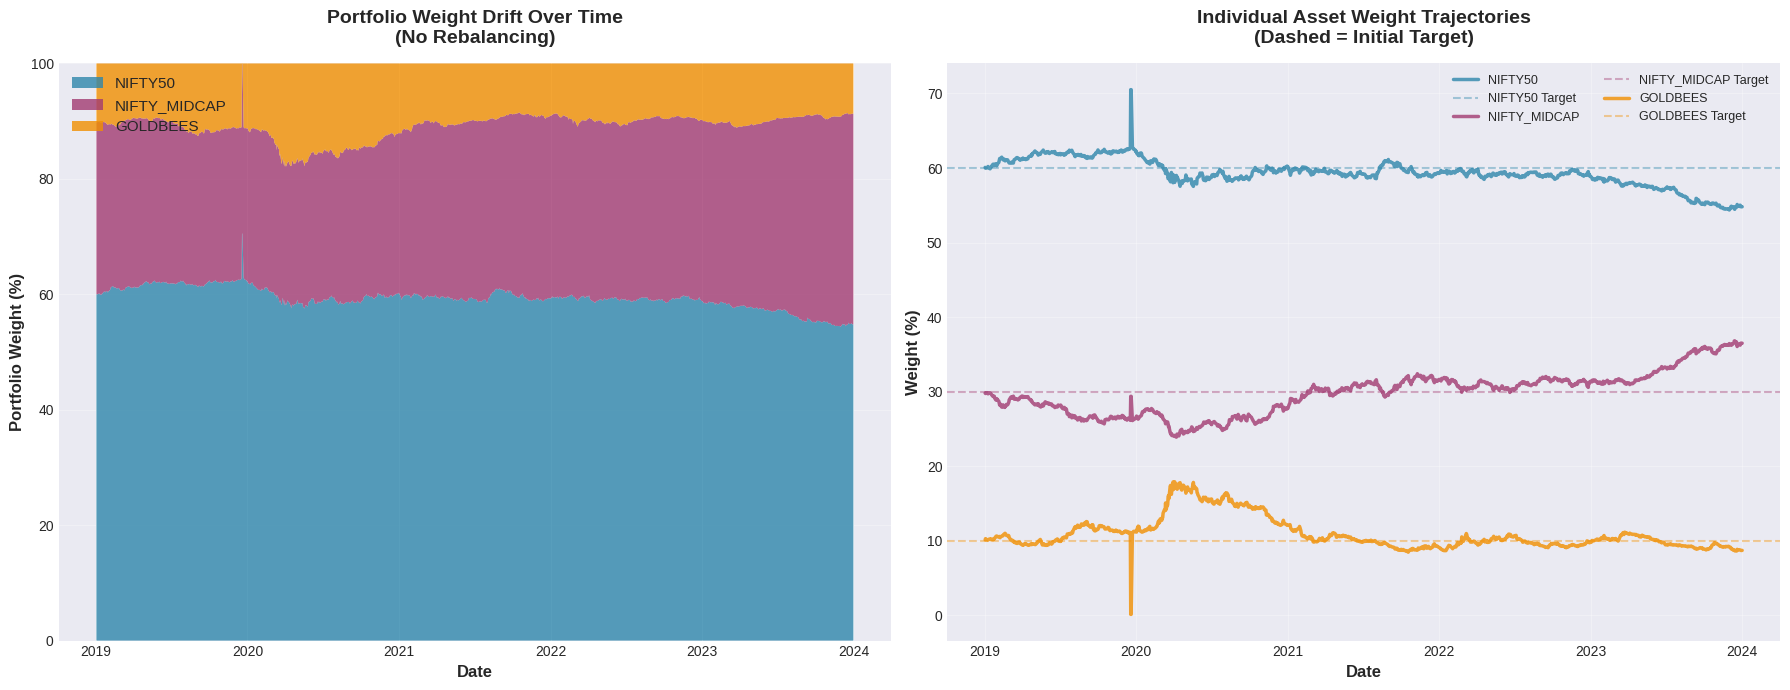


⚠️  KEY INSIGHT: Your portfolio composition changed dramatically!
    This affects:
    • Risk profile (more/less equity exposure)
    • Expected returns (different from original targets)
    • Portfolio mandate (may violate allocation rules)

    In Section 5, we'll explore rebalancing strategies to manage this drift.


In [ ]:
# 📊 VISUAL: Weight Drift Over Time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# LEFT: Stacked area showing weight evolution
ax1.stackplot(weight_drift.index,
              weight_drift['NIFTY50'] * 100,
              weight_drift['NIFTY_MIDCAP'] * 100,
              weight_drift['GOLDBEES'] * 100,
              labels=['NIFTY50', 'NIFTY_MIDCAP', 'GOLDBEES'],
              colors=['#2E86AB', '#A23B72', '#F18F01'],
              alpha=0.8)

ax1.set_ylabel('Portfolio Weight (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_title('Portfolio Weight Drift Over Time\n(No Rebalancing)',
             fontsize=14, fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=11)
ax1.set_ylim([0, 100])
ax1.grid(True, alpha=0.3, axis='y')

# RIGHT: Individual weight trajectories
for asset, color in [('NIFTY50', '#2E86AB'), ('NIFTY_MIDCAP', '#A23B72'), ('GOLDBEES', '#F18F01')]:
    ax2.plot(weight_drift.index, weight_drift[asset] * 100,
             linewidth=2.5, label=asset, color=color, alpha=0.8)
    # Add target weight line
    ax2.axhline(y=WEIGHTS[asset] * 100, color=color, linestyle='--',
               linewidth=1.5, alpha=0.4, label=f'{asset} Target')

ax2.set_ylabel('Weight (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_title('Individual Asset Weight Trajectories\n(Dashed = Initial Target)',
             fontsize=14, fontweight='bold', pad=15)
ax2.legend(loc='best', fontsize=9, ncol=2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️  KEY INSIGHT: Your portfolio composition changed dramatically!")
print("    This affects:")
print("    • Risk profile (more/less equity exposure)")
print("    • Expected returns (different from original targets)")
print("    • Portfolio mandate (may violate allocation rules)")
print("\n    In Section 5, we'll explore rebalancing strategies to manage this drift.")

---
## 📚 CONCEPTS: The Math Behind Portfolio Returns

### 1. Why Compounding is Non-Negotiable

**The Fundamental Truth:**
```
If you have ₹100 and earn 10%, you have ₹110
If you then lose 10%, you have ₹99, NOT ₹100

Mathematical reason: 110 × (1 - 0.10) = 99
Naive calculation: 100 + 10% - 10% = 100 ❌
```

**Correct Formula:**
$$R_{total} = \prod_{t=1}^{T}(1 + r_t) - 1 = (1+r_1) \times (1+r_2) \times ... \times (1+r_T) - 1$$

### 2. Weight Drift: The Silent Portfolio Changer

**Initial weights ≠ Current weights**

$$w_{i,t} = \frac{w_{i,0} \times (1 + R_{i,t})}{1 + R_{p,t}}$$

Where:
- $w_{i,t}$ = weight of asset $i$ at time $t$
- $R_{i,t}$ = return of asset $i$ from start to time $t$
- $R_{p,t}$ = portfolio return from start to time $t$

### 3. Buy-and-Hold vs. Time-Weighted Returns

**Buy-and-Hold (Method 2):**
- Measures what you actually earn
- Accounts for weight drift naturally
- Simple price ratio calculation

**Time-Weighted (Method 3):**
- Industry standard for performance measurement
- Useful for comparing strategies
- Essential for rebalancing analysis

Both are correct, just measuring different things!

---
## ⚠️ WARNING: Common Pitfalls Checklist

Before you trust ANY portfolio return calculation, verify:

### Critical Checklist
- [ ] **Dividends Reinvested?** Are you using total return indices?
- [ ] **Stock Splits Handled?** Unadjusted prices give false returns
- [ ] **Survivorship Bias?** Are delisted/merged stocks included?
- [ ] **Corporate Actions?** Bonus issues, rights issues accounted for?
- [ ] **Calendar Alignment?** All assets on same trading days?
- [ ] **Currency Consistency?** All returns in same currency?

### Red Flags
🚩 Returns don't match "eyeball test"  
🚩 Weights sum to >100% or <100%  
🚩 Portfolio value goes negative  
🚩 Returns jump discontinuously without news  

In [ ]:
# WARNING DEMONSTRATION: Impact of ignoring dividends

# Assume 1.5% annual dividend yield
dividend_yield = 0.015
years = len(portfolio_returns) / 252

return_without_div = port_method2
return_with_div = port_method2 + (dividend_yield * years)
error = (return_with_div - return_without_div) * 100

print("⚠️  DIVIDEND ERROR IMPACT:")
print(f"   Return WITHOUT dividends: {return_without_div*100:.2f}%")
print(f"   Return WITH dividends:    {return_with_div*100:.2f}%")
print(f"   Error magnitude:          {error:.2f} percentage points")
print(f"\n   💡 Over {years:.1f} years, ignoring dividends costs you {error:.1f}pp!")

⚠️  DIVIDEND ERROR IMPACT:
   Return WITHOUT dividends: 119.14%
   Return WITH dividends:    126.49%
   Error magnitude:          7.35 percentage points

   💡 Over 4.9 years, ignoring dividends costs you 7.4pp!


---
## 🎯 Exercise: Fix the Broken Code!

### Exercise: Debug the Return Calculator

Below is a portfolio return calculator with **3 intentional bugs**. Your task:
1. Run the code and observe the wrong output
2. Identify the bugs (hints provided)
3. Fix them one by one
4. Verify your fixes give the correct result

In [ ]:
# 🐛 BUGGY CODE - Find the bugs!

def calculate_portfolio_return_buggy(prices, weights, initial_capital):
    """
    BUGGY portfolio return calculator
    Find and fix 3 bugs to get the correct return
    """

    # Bug 1: Wrong return calculation method
    # HINT: Should use percentage change, not absolute difference
    returns = prices.diff()  # 🐛 BUG HERE!
    returns = returns.dropna()

    # Bug 2: Incorrect weight application
    # HINT: Need to convert weights dict to Series with correct index
    portfolio_returns = returns.sum(axis=1) * sum(weights.values())  # 🐛 BUG HERE!

    # Bug 3: Wrong compounding method
    # HINT: Should use geometric/multiplicative compounding
    total_return = portfolio_returns.sum()  # 🐛 BUG HERE!

    final_value = initial_capital * (1 + total_return)

    return total_return, final_value

# Run the buggy code
buggy_return, buggy_value = calculate_portfolio_return_buggy(portfolio_prices, WEIGHTS, INITIAL_CAPITAL)

print("🐛 BUGGY CODE OUTPUT:")
print(f"   Total Return: {buggy_return*100:.2f}%")
print(f"   Final Value:  ₹{buggy_value:,.0f}")
print(f"\n   Expected Return: {port_method2*100:.2f}%")
print(f"   Expected Value:  ₹{total_value.iloc[-1]:,.0f}")
print(f"\n   ❌ Error: {abs(buggy_return - port_method2)*100:.1f} percentage points")

In [ ]:
# ✅ YOUR TURN: Fix the code below
# Replace the ??? with correct code

def calculate_portfolio_return_fixed(prices, weights, initial_capital):
    """
    FIXED portfolio return calculator
    Complete the missing code
    """

    # Fix 1: Calculate percentage returns correctly
    returns = prices.pct_change()  # YOUR CODE: Use pct_change() method
    returns = returns.dropna()

    # Fix 2: Apply weights correctly
    cumulative_growth = prices / prices.iloc[0]
    portfolio_value = initial_capital * (cumulative_growth * pd.Series(weights)).sum(axis=1)
    #portfolio_returns = None  # YOUR CODE: (returns * pd.Series(weights)).sum(axis=1)

    # Fix 3: Use geometric compounding
    total_return = (portfolio_value.iloc[-1] / initial_capital)-1  # YOUR CODE: (1 + portfolio_returns).prod() - 1

    final_value = portfolio_value.iloc[-1]

    return total_return, final_value


# Uncomment to test your solution:
fixed_return, fixed_value = calculate_portfolio_return_fixed(portfolio_prices, WEIGHTS, INITIAL_CAPITAL)
print(f"✅ Fixed Return: {fixed_return*100:.2f}%")
print(f"✅ Fixed Value: ₹{fixed_value:,.0f}")
error = abs(fixed_return - port_method2) / port_method2 * 100
print(f"\nError: {error:.3f}% {'✅ CORRECT!' if error < 0.1 else '❌ Keep trying'}")

✅ Fixed Return: 119.14%
✅ Fixed Value: ₹219,143

Error: 0.000% ✅ CORRECT!


---
## 📝 Section 1 Summary: Key Takeaways

### What We Learned

1. **Return Calculation**
   - Simple average and arithmetic sum are WRONG
   - Geometric compounding is CORRECT
   - Buy-and-hold and time-weighted both work (for different purposes)

2. **Portfolio Growth Decomposition**
   - Individual assets grow at different rates
   - This creates differential wealth accumulation
   - Your ₹30k in one asset might become ₹54k, while ₹10k becomes ₹12k

3. **Weight Drift**
   - Portfolio weights naturally drift away from targets
   - 60/30/10 can become 65/28/7 over time
   - This changes your risk/return profile

### Next Section Preview
**Section 2: Factor Attribution** - Understanding what drives your returns  

**Questions? Observations? Flag anything that doesn't make sense!**

In [ ]:
# BONUS: Quick Reference Functions

def calculate_buy_hold_return(prices, weights, initial_capital=100000):
    """Calculate buy-and-hold return (Method 2)"""
    start_prices = prices.iloc[0]
    end_prices = prices.iloc[-1]
    asset_returns = (end_prices / start_prices) - 1
    total_return = (asset_returns * pd.Series(weights)).sum()
    final_value = initial_capital * (1 + total_return)
    return total_return, final_value

def calculate_time_weighted_return(prices, weights, initial_capital=100000):
    """Calculate time-weighted return (Method 3)"""
    returns = prices.pct_change().dropna()
    portfolio_returns = (returns * pd.Series(weights)).sum(axis=1)
    total_return = (1 + portfolio_returns).prod() - 1
    portfolio_values = initial_capital * (1 + portfolio_returns).cumprod()
    return total_return, portfolio_values

print("✓ Utility functions loaded for future sections")